# Graded Challenge 2
Name : `Kamil Riyadi Alam Situmeang`

Batch : `FTDS009`

## I. Introduction

This project is meant for fulfilling `Hacktiv8 Fulltime Datascience Bootcamp assignment.`

In this project, I will try to create `Machine Learning prediction model` using `Linear Regression & Supported Machine Vector` algorithm

### I.2 Dataset Description

Dataset for this project is made available by [`Joe Young`](https://www.kaggle.com/brllrb), a kaggler from South Carolina, United States. You can check the dataset [here.](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv)

**Content**

This dataset contains about 10 years of daily weather observations from many locations across Australia.

RainTomorrow is the target variable to predict. It means -- did it rain the next day, Yes or No? This column is Yes if the rain for that day was 1mm or more.

------------------------------------------------------------------------------------------------------------------------------------------

**Attribute Information**

| Input Parameter | Description                                                                                                            |
| --------------- | ---------------------------------------------------------------------------------------------------------------------- |
| Date            | The date of observation                                                                                                |
| Location        | The common name of the location of the weather station                                                                 |
| MinTemp         | The minimum temperature in degrees celsius                                                                             |
| MaxTemp         | The maximum temperature in degrees celsius                                                                             |
| Rainfall        | The amount of rainfall recorded for the day in mm                                                                      |
| Evaporation     | The so-called Class A pan evaporation (mm) in the 24 hours to 9am                                                      |
| Sunshine        | The number of hours of bright sunshine in the day.                                                                     |
| WindGustDir     | The direction of the strongest wind gust in the 24 hours to midnight                                                   |
| WindGustSpeed   | The speed (km/h) of the strongest wind gust in the 24 hours to midnight                                                |
| WindDir9am      | Direction of the wind at 9am                                                                                           |
| WindDir3pm      | Direction of the wind at 3pm                                                                                           |
| WindSpeed9am    | Wind speed (km/hr) averaged over 10 minutes prior to 9am                                                               |
| WindSpeed3pm    | Wind speed (km/hr) averaged over 10 minutes prior to 3pm                                                               |
| Humidity9am     | Humidity (percent) at 9am                                                                                              |
| Humidity3pm     | Humidity (percent) at 3pm                                                                                              |
| Pressure9am     | Atmospheric pressure (hpa) reduced to mean sea level at 9am                                                            |
| Pressure3pm     | Atmospheric pressure (hpa) reduced to mean sea level at 3pm                                                            |
| Cloud9am        | Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many |
| Cloud3pm        | Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values           |
| Temp9am         | Temperature (degrees C) at 9am                                                                                         |
| Temp3pm         | Temperature (degrees C) at 3pm                                                                                         |
| RainToday       | Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0                                       |


| Target Parameter | Description                         |
| ---------------- | ----------------------------------- |
| RainTomorrow     | did it rain the next day, Yes or No |

------------------------------------------------------------------------------------------------------------------------------------------

**Source & Acknowledgements**

Observations were drawn from numerous weather stations. The daily observations are available from http://www.bom.gov.au/climate/data.\
An example of latest weather observations in Canberra: http://www.bom.gov.au/climate/dwo/IDCJDW2801.latest.shtml

Definitions adapted from http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml\
Data source: http://www.bom.gov.au/climate/dwo/ and http://www.bom.gov.au/climate/data.

Copyright Commonwealth of Australia 2010, Bureau of Meteorology.

### I.3 Objectives

Main objectives for this project are:
- Create classification machine learning model with `Logistic Regression and Support Vector Machine`
- Predict wethwe it will `RainTomorrow` or not based from information given in the dataset.

## II. Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from datetime import datetime as dt

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Metric
from sklearn.metrics import classification_report, plot_roc_curve, roc_auc_score, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

## III. Data Loading


In [2]:
# Load Data and save it in `df_og` variable
df_og = pd.read_csv('weatherAUS.csv', parse_dates=['Date'])

# Make copy from the df
df = df_og.copy()

### Dataset Preview

In [3]:
# Show the dataset
pd.set_option('display.max.columns', None)

df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
# Dataset Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [5]:
# Dataset Shape
df.shape

(145460, 23)

In [6]:
# Null value summary
df.isnull().sum().sort_values()

Date                 0
Location             0
MaxTemp           1261
MinTemp           1485
Temp9am           1767
WindSpeed9am      1767
Humidity9am       2654
WindSpeed3pm      3062
Rainfall          3261
RainToday         3261
RainTomorrow      3267
Temp3pm           3609
WindDir3pm        4228
Humidity3pm       4507
WindGustSpeed    10263
WindGustDir      10326
WindDir9am       10566
Pressure3pm      15028
Pressure9am      15065
Cloud9am         55888
Cloud3pm         59358
Evaporation      62790
Sunshine         69835
dtype: int64

In [7]:
# Dataset Check
df.describe(percentiles=[0.5]).T

,count,mean,std,min,50%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,12.0,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,22.6,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,4.8,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,8.4,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,39.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,13.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,19.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,70.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,52.0,100.0


In [8]:
# Dataset Check
df.describe(include='object').T

,count,unique,top,freq
Location,145460,49,Canberra,3436
WindGustDir,135134,16,W,9915
WindDir9am,134894,16,N,11758
WindDir3pm,141232,16,SE,10838
RainToday,142199,2,No,110319
RainTomorrow,142193,2,No,110316


Insight from `Dataset Preview` process:

Based on above process, I get these information:

- The dataset consist of `145460 rows` of entries and `23 columns.`
- There are missing values everywhere, even in the target parameter. Gotta check more of it later in the process.
- From `.describe` process for `numerical parameter`, it looks like there are no strange entry. `min-max` value range is still make sense in each parameter.
- From `.describe` process for `categorical parameter`, it looks like there are no strange entry. There are 49 `location` in the dataset, `Win Direction` using 16-direction, and `RainToday or RainTomorrow` shows only two unique values. 

## IV. Exploratory Data Analysis

### Univariate Analysis

[The purpose of univariate analysis is to understand the distribution of values for a single variable.](https://www.statology.org/univariate-analysis/)

Since our target parameter is `RainTomorrow`, let's get to know about it more deeply.

In [9]:
# Quick Info
df['RainTomorrow'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 145460 entries, 0 to 145459
Series name: RainTomorrow
Non-Null Count   Dtype 
--------------   ----- 
142193 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


In [10]:
# Number of unique value
print(df['RainTomorrow'].value_counts())
print()
print(df['RainTomorrow'].value_counts(normalize=True)*100)

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

No     77.581878
Yes    22.418122
Name: RainTomorrow, dtype: float64


In [11]:
# Count of missing value
print('Miss. val. count :', df['RainTomorrow'].isnull().sum())
print()
print('Miss. val. percentage :', df['RainTomorrow'].isnull().sum()/len(df['RainTomorrow'])*100)

Miss. val. count : 3267

Miss. val. percentage : 2.245978275814657


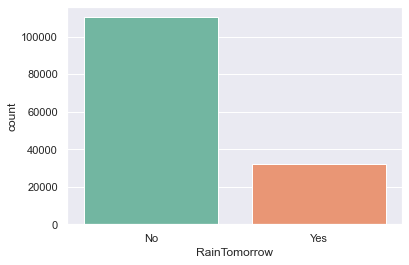

In [12]:
# Distribution Check

sns.countplot(df['RainTomorrow'], palette='Set2')
plt.show()

Insight from `Univariate Analysis`:

Here are information that We can get from process above:
- The target paramater `RainTomorrow` is `categorical` parameter that has two unique value which is `Yes` and `No`
- In the dataset, the majority of the instances is category `No` which fill `77.58%` of total instance.
- There are 3267 instance of missing values, equal to `2.25%` of total instance.

Since `RainTomorrow` is `categorical`, let's convert it to `categorical-numerical` parameter.

In [13]:
# Converting Rain Today and Rain Tomorrow into `numerical` type

nom = ['RainToday', 'RainTomorrow']

for i in nom:
    df[i].replace({'No':0, 'Yes':1}, inplace=True)

Yep, now `RainTomorrow` target parameter is now in `categorical-numerical` input format. Let's get to the next process.

### Bivariate / Multivariate  Analysis

[The purpose of bivariate analysis is to understand the relationship between two variables.](https://www.statology.org/bivariate-analysis/)

In this part of sub-process, I will try to map the correlation between each input parameter to the target parameter. For this task I'll utilize the most common type of correlation coeffiecient which is `Pearson Correlation` in the form of `Heatmap` chart.

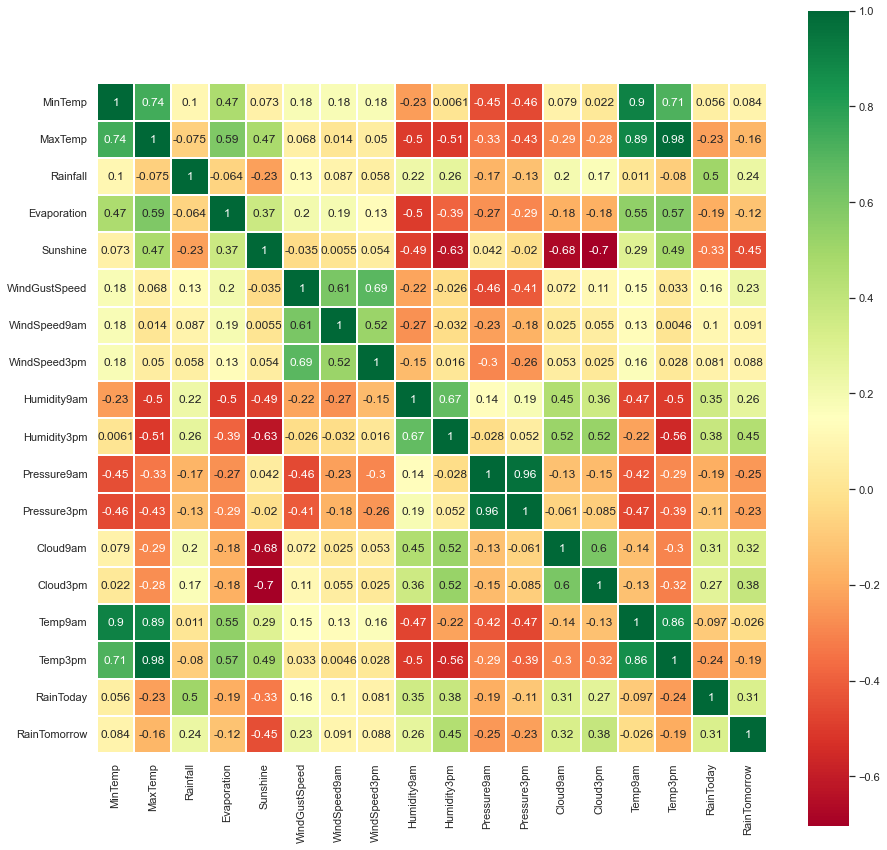

In [14]:
# Checking correlation between each parameter

# Heatmap
corrmat = df.corr()
top_corr_feature = corrmat.index


plt.figure(figsize=(15,15))

g = sns.heatmap(df[top_corr_feature].corr(), annot=True, cmap='RdYlGn', square=1, linewidths=0.05)

Insight from `Bivariate/Univariate Analysis`:

Here are information that We can get from process above:
- We can see input parameter like `Rainfall, WindGustSpeed, WindSpeed, Humidity, and Cloud` has positive correlation with the target parameter `RainTomorrow`. 
- We can see input parameter like `MaxTemp, Temp, Sunshine, and Pressure` has negative correlation with the target parameter `RainTomorrow`. 

I can say, on general, there are no input parameter that is strongly related to `RainTomorrow` target parameter. Hence I will keep all input parameter for now, I'll choose my main input parameter later in the feature selection process.

Now I'll try to focus on each `numerical` and `categorical` parameter within my dataset. I'll need seperate both categories before start the analysis.

In [15]:
# Paramater Categorization

numerical_col = df.select_dtypes(include=np.number).columns.tolist()
categorical_col = df.select_dtypes(include=['object']).columns.tolist()

In [16]:
# Show each categories

print('Numerical Parameter')
print(numerical_col)
print()
print('Categorical Parameter')
print(categorical_col)

Numerical Parameter
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']

Categorical Parameter
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']


### Numerical Parameter Analysis

In this part of sub-process, I'll try to get to know to my `Numerical` parameter.

In [17]:
# Statistical Summary
df[numerical_col].describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


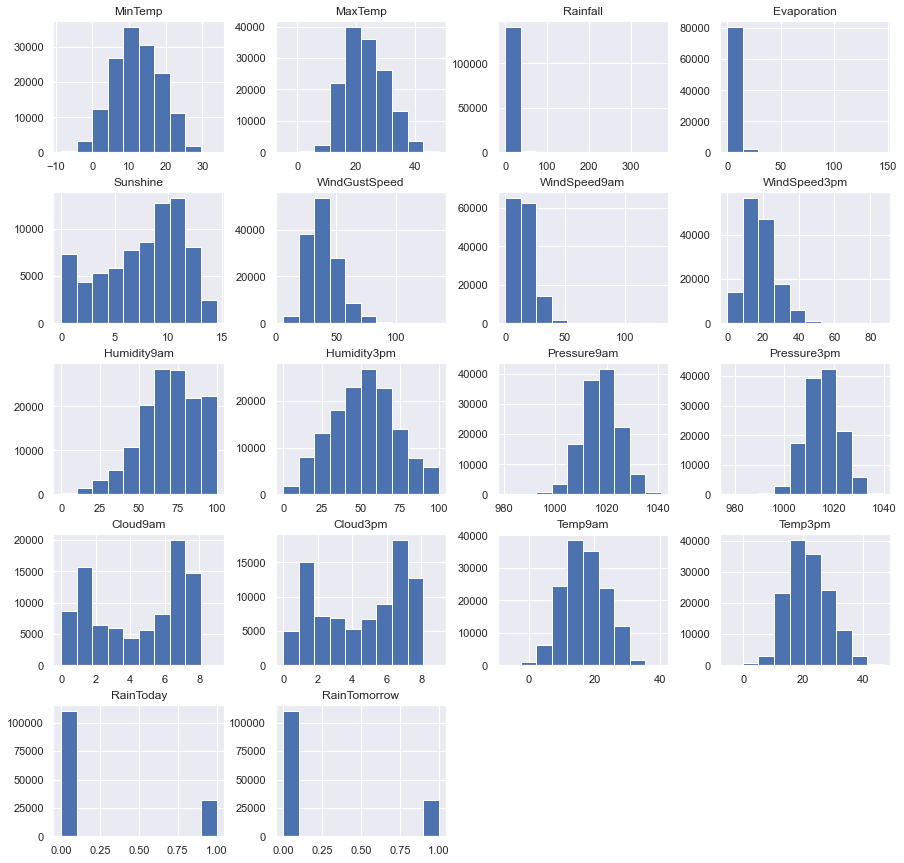

In [18]:
# Distribution Check

df[numerical_col].hist()
plt.gcf().set_size_inches(15, 15)
plt.show()

Insight for `Numerical Parameter` analysis:
- Like statement I made previously, it looks like there are no strange entry in each parameter.
- From distribution plot, We can see that parameter like `'MinTemp', 'MaxTemp', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'` are `normally distributed`
- From distribution plot, We can see that parameter like `'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm'` are `skew distributed`

### Categorical Parameter Analysis (Cardinality Check)

In this part of sub-process, I'll try to get to know to my `Categorical` parameter.

I'll run through `categorical` input parameter and check their `Cardinality`. There will be a chance that I will `re-classify` input parameter with `high-cardinality` or even `drop` whole input parameter with `low-variance.`

In [19]:
# Cardinality Summary
for i in df[categorical_col].columns:
    print(i, ':', df[i].nunique())

Location : 49
WindGustDir : 16
WindDir9am : 16
WindDir3pm : 16


From summary above, We can see that `Location, WindGustDir, WindDir9am, WindDir3pm` has relatively `high cardinality` compared to `RainToday and RainTomorrow.`\
Let's check each parameter `unique value.`

In [20]:
# Check unique value for each parameter

for i in categorical_col:
    print(i,"|", 'Cardinality count :', df[i].nunique())
    print(df[i].unique())
    print('_____'*20)


Location | Cardinality count : 49
['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
____________________________________________________________________________________________________
WindGustDir | Cardinality count : 16
['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']
____________________________________________________________________________________________________
WindDir9am | Cardinality count : 16
['W' 'NNW' 'SE' 'EN

Based on result above there is missing value that is listed too.\
Here is what I am going to do to handle those `high cardinality` parameter:
- Drop `Location` from dataframe because it has high cardinality, also I decide that my prediction model will not location based.
- Transform `16 way wind direction` into more simple  `4 way wind direction.` I'll focus to first letter of each wind direction only.

In [21]:
# Drop `Location` parameter

df.drop(['Location'], axis=1, inplace=True)

In [22]:
# Reclassify `wind direction` related parameter

wind = ['WindGustDir', 'WindDir9am', 'WindDir3pm']

for i in wind:
    df[i] = df[i].astype(str).str[0]

In [23]:
# Confirmation Process
check = ['WindGustDir', 'WindDir9am', 'WindDir3pm']

for i in check:
    print(i,"|", 'Unique value count :', df[i].nunique())
    print(df[i].unique())
    print('_____'*20)

WindGustDir | Unique value count : 5
['W' 'N' 'S' 'n' 'E']
____________________________________________________________________________________________________
WindDir9am | Unique value count : 5
['W' 'N' 'S' 'E' 'n']
____________________________________________________________________________________________________
WindDir3pm | Unique value count : 5
['W' 'E' 'N' 'S' 'n']
____________________________________________________________________________________________________


Now `wind direction` related parameter has only 4 cardinality plus 1 `null values`. Let's convert `n` values back into null values

In [24]:
# convert `n` back to `nan`` values`

wind = ['WindGustDir', 'WindDir9am', 'WindDir3pm']

for i in wind:
    df[i].replace({'n':np.nan}, inplace=True)

Now, I'll transform the `Date` parameter and split into `Year`, `Month`, `Day` parameter.

In [25]:
# Split `Date` into `Year`, `Month`, `Day`
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Since I already have `Year`, `Month`, `Day` parameter, I can drop `Date`
df.drop(['Date'], axis=1, inplace=True)

Let's get to the next process.

## V. Data Preprocessing

In this process I  split my dataset into `train, test, and inference` dataset.

But before start splitting, We knew from previous process that there are missing value in target parameter. In order to preserve my data quaity, instead of impute value to missing value, I'll just drop those missing value.

In [26]:
# Discard entries with missing value from `RainTomorrow` target parameter.

print('before drop :', df.shape)
df.dropna(subset=['RainTomorrow'], inplace=True)
df.reset_index(drop=True, inplace=True)
print('after drop :', df.shape)

before drop : (145460, 24)
after drop : (142193, 24)


In [27]:
# Confirmation
df['RainTomorrow'].isnull().sum()

0

It's confirmed that there are no more missing value in target parameter. Now I can continue to split my dataset.

### Dataset Splitting

In this process, I will split my dataset into three different set:
1. Inference Set : Will be used `as if` new instance that is taken from real population.
2. Train Set : Will be used to `train` the `machine learning` model.
3. Test Set : Will be used to `test` the `machine learning` model.

I will take `193` sample for `Inference Set` and then:
1. Take 70% of dataset for `Train Set`
2. Take 30% of dataset for `Test Set`

all of those entries will be randomly selected from the dataset.

In [28]:
# Inference Set Preparation

inf_set = df.sample(193, random_state=10)
inf_set.shape

(193, 24)

In [29]:
# Exclude Inference Set from main dataset
train_test_set = df.drop(inf_set.index)
train_test_set.reset_index(drop=True, inplace=True)

train_test_set.shape

(142000, 24)

In [30]:
# Splitting Dataset

# X will be consist of input parameter only
X = train_test_set.drop(['RainTomorrow'], axis=1)

# y will be consist of target parameter only
y = train_test_set['RainTomorrow']

In [31]:
# Train Set & Test Set Preparation

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

print('Train Set shape : ', X_train.shape)
print('Test Set shape : ', X_test.shape)

Train Set shape :  (99400, 23)
Test Set shape :  (42600, 23)


### Handling Outliers

In this sub-process, I will try to look the outliers inside `'numerical_col'` input parameter.

I'll check the distribution of the input parameter first. Distribution check is important for determining how to handle the outliers.

- If the input parameter is normally distributed, `Z-score` will be utilized for determining the outliers threshold.
- If the input parameter is skew distributed, `IQR` will be utilized for determining the outliers threshold.

I'll utilize `pandas.skewness()` method for this distribution check. Any skewness value outside `-0.5 to 0.5` will be considered as `Skewed Distribution`

In [32]:
# Input Paramater Distribution  Check
dist_check = X_train.skew(numeric_only=True)

normal_dist = []
skew_dist = []

for i in range(len(dist_check)):
    if dist_check.values[i] < -0.5:
        skew_dist.append(dist_check.index[i])
    elif dist_check.values[i] > 0.5:
        skew_dist.append(dist_check.index[i])
    else:
        normal_dist.append(dist_check.index[i])

In [33]:
# Skew dist
print('skew_dist :', skew_dist)
print("__________"*20)
# normal_dist
print('normal_dist :',normal_dist)
print("__________"*20)

skew_dist : ['Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'RainToday']
________________________________________________________________________________________________________________________________________________________________________________________________________
normal_dist : ['MinTemp', 'MaxTemp', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']
________________________________________________________________________________________________________________________________________________________________________________________________________


We will focus on input parameter that is in `'numerical_col'`, since there is no such outliers in input parameter in `'categorical_col'` 

Now let's check if there are any outliers in each input parameter.

In [34]:
# Outliers Detection Function
# for Normally Distributed Data

def detect_normal(df, parameter):
    
    threshold = 3
    mean_ = np.mean(df[parameter])
    std_ = np.std(df[parameter])

    upper_count = df[
                    ((df[parameter]-mean_)/std_) > threshold
                    ][parameter].count()

    bottom_count = df[
                    ((df[parameter]-mean_)/std_) < -threshold
                    ][parameter].count()

    total_count = upper_count + bottom_count

    percentage = (total_count/len(df[parameter])*100).round(2)

    a = ({'Parameter':parameter, 'Total Outliers':total_count, 'Percentage':percentage})

    return print(a)


In [35]:
# Outliers Detection Function
# for Skew Distributed Data

def detect_skew(df, parameter, fold=1.5):
    
    for i in parameter:
        
        IQR = df[parameter].quantile(0.75) - df[parameter].quantile(0.25)
        upper = df[parameter].quantile(0.75) + (fold*IQR)
        bottom = df[parameter].quantile(0.25) - (fold*IQR)

        upper_count = df[
            (df[parameter] > upper)
        ][parameter].count()

        bottom_count = df[
            (df[parameter] < bottom)
        ][parameter].count()
        
        total_count = upper_count + bottom_count

        percentage = (total_count/len(df[parameter])*100).round(2)

        a = ({'Parameter':parameter, 'Total Outliers':total_count, 'Percentage':percentage})

    return print(a)

In [36]:
# Outlier summary
# For normally distributed input parameter

for i in normal_dist:
    detect_normal(X_train, parameter=i)

{'Parameter': 'MinTemp', 'Total Outliers': 9, 'Percentage': 0.01}
{'Parameter': 'MaxTemp', 'Total Outliers': 206, 'Percentage': 0.21}
{'Parameter': 'Humidity9am', 'Total Outliers': 334, 'Percentage': 0.34}
{'Parameter': 'Humidity3pm', 'Total Outliers': 0, 'Percentage': 0.0}
{'Parameter': 'Pressure9am', 'Total Outliers': 351, 'Percentage': 0.35}
{'Parameter': 'Pressure3pm', 'Total Outliers': 296, 'Percentage': 0.3}
{'Parameter': 'Cloud9am', 'Total Outliers': 0, 'Percentage': 0.0}
{'Parameter': 'Cloud3pm', 'Total Outliers': 0, 'Percentage': 0.0}
{'Parameter': 'Temp9am', 'Total Outliers': 89, 'Percentage': 0.09}
{'Parameter': 'Temp3pm', 'Total Outliers': 267, 'Percentage': 0.27}
{'Parameter': 'Year', 'Total Outliers': 0, 'Percentage': 0.0}
{'Parameter': 'Month', 'Total Outliers': 0, 'Percentage': 0.0}
{'Parameter': 'Day', 'Total Outliers': 0, 'Percentage': 0.0}


Since most of the outliers percentage in `normally distributed` data is less than 1%, I will just let the outliers be right now and handle it if my model performance is poor.

Now, let's check for `skew distributed` data

In [37]:
# Outlier summary
# For skew distributed input parameter

for i in skew_dist:
    detect_skew(X_train, parameter=i)

{'Parameter': 'Rainfall', 'Total Outliers': 17658, 'Percentage': 17.76}
{'Parameter': 'Evaporation', 'Total Outliers': 1365, 'Percentage': 1.37}
{'Parameter': 'Sunshine', 'Total Outliers': 0, 'Percentage': 0.0}
{'Parameter': 'WindGustSpeed', 'Total Outliers': 2122, 'Percentage': 2.13}
{'Parameter': 'WindSpeed9am', 'Total Outliers': 1187, 'Percentage': 1.19}
{'Parameter': 'WindSpeed3pm', 'Total Outliers': 1723, 'Percentage': 1.73}
{'Parameter': 'RainToday', 'Total Outliers': 22022, 'Percentage': 22.15}


For `skew distributed` data it looks like there is one parameters that has relatively high outliers percentage, which is `Rainfall` (p.s We can ignore `RainToday` due to it is `categorical` type parameter).
In my personal opinion, because this data related to natural occurence it is natural to have outliers in the record. So, I'll just assume it is safe to let the outliers be at the moment.

Note: My assumption is still need to be proved with data, but I'll save the work for next time.

### Missing Value

In this sub-process, I will handle any missing value inside the dataset. Let's check the missing value in each parameter.

In [38]:
# Missing Value check
# X_train Set

for i in X_train.columns:
    print('parameter :', i)
    print('miss val count :', X_train[i].isnull().sum())
    print('miss val percentage :', ((X_train[i].isnull().sum())/(len(X_train[i]))*100))
    print("__________"*10)

parameter : MinTemp
miss val count : 446
miss val percentage : 0.4486921529175051
____________________________________________________________________________________________________
parameter : MaxTemp
miss val count : 230
miss val percentage : 0.23138832997987926
____________________________________________________________________________________________________
parameter : Rainfall
miss val count : 993
miss val percentage : 0.9989939637826961
____________________________________________________________________________________________________
parameter : Evaporation
miss val count : 42455
miss val percentage : 42.7112676056338
____________________________________________________________________________________________________
parameter : Sunshine
miss val count : 47296
miss val percentage : 47.58148893360161
____________________________________________________________________________________________________
parameter : WindGustDir
miss val count : 6548
miss val percentage : 6.5875251

In [39]:
# Missing Value check
# X_test Set

for i in X_test.columns:
    print('parameter :', i)
    print('miss val count :', X_test[i].isnull().sum())
    print('miss val percentage :', (X_test[i].isnull().sum())/(len(X_test[i]))*100)
    print("__________"*10)

parameter : MinTemp
miss val count : 191
miss val percentage : 0.4483568075117371
____________________________________________________________________________________________________
parameter : MaxTemp
miss val count : 92
miss val percentage : 0.215962441314554
____________________________________________________________________________________________________
parameter : Rainfall
miss val count : 411
miss val percentage : 0.9647887323943662
____________________________________________________________________________________________________
parameter : Evaporation
miss val count : 18310
miss val percentage : 42.981220657277
____________________________________________________________________________________________________
parameter : Sunshine
miss val count : 20438
miss val percentage : 47.97652582159625
____________________________________________________________________________________________________
parameter : WindGustDir
miss val count : 2770
miss val percentage : 6.50234741784

Based on result above there are lots of missing value in the dataset, let's take closer look into the dataset to judge wether the missing value is `Missing Completly at Random, Missing at Random, or Missing not at Random.`

In [40]:
# Dataset Check
X_train.sample(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
35968,8.4,18.1,0.6,1.6,NaN,N,59.0,N,N,11.0,26.0,79.0,60.0,1009.4,1003.3,8.0,7.0,12.9,16.9,0.0,2009,6,30
96760,13.5,17.6,2.8,NaN,NaN,W,13.0,E,W,4.0,4.0,87.0,65.0,1027.4,1025.4,NaN,NaN,14.7,17.1,1.0,2017,4,29
93241,23.3,34.9,0.0,10.0,12.0,N,26.0,N,N,4.0,13.0,66.0,44.0,1008.9,1005.2,6.0,3.0,29.9,33.9,0.0,2016,2,16
13005,15.7,29.2,0.0,6.8,11.1,N,37.0,N,N,15.0,13.0,61.0,34.0,1021.1,1017.6,2.0,4.0,19.6,28.0,0.0,2012,3,26
3772,15.2,30.3,0.8,NaN,NaN,S,39.0,N,S,7.0,19.0,87.0,59.0,1017.6,1016.6,NaN,NaN,20.1,26.0,0.0,2011,3,16
1775,18.8,40.6,0.0,NaN,NaN,N,39.0,E,N,7.0,13.0,51.0,18.0,1015.2,1011.1,NaN,NaN,26.7,39.3,0.0,2014,1,29
113362,31.2,44.3,0.0,NaN,12.2,E,54.0,N,S,31.0,30.0,10.0,22.0,1007.7,1007.8,NaN,NaN,40.2,35.8,0.0,2014,1,12
60192,8.9,15.3,2.0,3.6,4.7,W,56.0,W,W,24.0,30.0,69.0,60.0,1015.7,1016.5,4.0,6.0,12.1,14.0,1.0,2010,6,19
802,12.3,25.2,0.0,NaN,NaN,S,69.0,S,S,15.0,9.0,53.0,43.0,1022.1,1020.5,NaN,NaN,15.0,23.2,0.0,2011,2,22
118318,3.7,17.9,0.0,2.0,9.8,S,31.0,NaN,S,0.0,13.0,69.0,39.0,1024.7,1022.8,0.0,1.0,11.4,17.3,0.0,2010,8,7


In [41]:
# Dataset Check
X_test.sample(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
56844,3.2,12.1,0.0,1.2,NaN,S,31.0,W,S,13.0,13.0,78.0,59.0,1022.3,1021.2,1.0,7.0,6.4,11.2,0.0,2009,7,5
2670,2.1,13.4,0.0,NaN,NaN,E,13.0,NaN,S,0.0,2.0,100.0,96.0,1026.2,1022.6,NaN,8.0,7.3,11.8,0.0,2016,7,18
86501,22.8,29.0,2.4,7.8,0.9,S,35.0,S,E,13.0,17.0,82.0,61.0,1012.8,1010.9,7.0,5.0,25.0,28.2,1.0,2013,12,23
90999,15.2,28.4,0.0,8.0,11.0,N,39.0,N,N,13.0,22.0,54.0,50.0,1016.4,1012.3,3.0,1.0,26.1,27.0,0.0,2009,9,21
135619,16.2,36.2,0.0,NaN,NaN,S,39.0,E,E,19.0,17.0,20.0,12.0,1013.9,1009.4,NaN,NaN,27.2,35.0,0.0,2017,2,26
67368,15.1,21.4,0.0,8.4,0.0,S,30.0,S,S,17.0,15.0,76.0,61.0,1016.8,1012.9,NaN,NaN,16.8,20.9,0.0,2013,12,21
43550,12.8,21.3,0.0,NaN,NaN,N,24.0,W,N,7.0,17.0,59.0,52.0,1024.8,1021.0,NaN,NaN,16.1,19.7,0.0,2015,5,27
92488,27.1,33.2,0.0,12.0,10.7,E,44.0,E,E,24.0,33.0,62.0,61.0,1011.6,1009.3,5.0,5.0,30.6,31.5,0.0,2014,1,23
74153,14.4,26.8,0.0,4.6,9.6,N,35.0,N,N,19.0,17.0,61.0,36.0,1026.1,1024.7,NaN,NaN,17.7,26.4,0.0,2013,5,9
7700,26.2,41.4,0.0,13.6,NaN,E,44.0,E,E,17.0,9.0,21.0,14.0,1011.0,1009.0,3.0,2.0,31.0,39.7,0.0,2014,2,11


From dataset check above, I cannot find any explanation why would an input parameter got null values in it. I'll just assume this null values as `Missing Completly at Random` type.

To handle these missing values, I'll do imputation with `Mean or Median` value for each `numerical` input parameter (based on input distribution) and `Mode` value for each `categorical` input parameter. These imputation value will be taken from `Training Set only` to avoid any `information leakage.`

In [42]:
# Categorization of parameter
num_col = ['MinTemp', 'MaxTemp', 'WindGustSpeed', 'Rainfall', 'Evaporation', 'Sunshine', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

cat_col = ['WindGustDir','WindDir9am', 'WindDir3pm', 'RainToday']

In [43]:
# Missing Value Handling
# For num_col

# Make dictionary
num_col_med = {} # For skew distributed column
num_col_mean = {} # For normally distributed column

for i in [X_train, X_test]:
    for j in num_col:
        if i[j].skew() < -0.5 or i[j].skew() > 0.5: # check the distribution of the column
            num_col_med.update({j:X_train[j].median()}) # calculate median for skew distributed
            i[j].fillna(num_col_med[j], inplace=True) # fill with median for skew distributed
        else:
            num_col_mean.update({j:X_train[j].median()}) # calculate mean for normally distributed
            i[j].fillna(num_col_mean[j], inplace=True) # fill with mean for normally distributed

In [44]:
# Missing Value Handling
# For cat_col

# Make dictionary
cat_col_mode = {}

for i in [X_train, X_test]:
    for j in cat_col:
        cat_col_mode.update({j:X_train[j].mode().item()}) # calculate mode
        i[j].fillna(cat_col_mode[j], inplace=True) # fill with mode

In [45]:
cat_col_mode

{'WindGustDir': 'S', 'WindDir9am': 'N', 'WindDir3pm': 'S', 'RainToday': 0.0}

In [46]:
# Confirmation

print(X_train.isnull().sum())
print(X_test.isnull().sum())

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64


Based on confirmation process above, I can confirm that my dataset is now free from missing values.

### Feature Selection

In this part of sub-process, I will select input parameters that will be used in `RainTomorrow` prediction model.

Let's see our dataset.

In [47]:
# Dataset Check
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
65755,5.7,21.8,0.0,4.2,12.0,N,41.0,N,S,11.0,9.0,63.0,26.0,1017.8,1012.4,0.0,1.0,10.5,20.9,0.0,2008,10,5
10391,10.6,25.4,0.0,3.6,10.9,S,20.0,N,S,9.0,13.0,50.0,37.0,1013.5,1011.4,0.0,0.0,21.6,24.3,0.0,2013,4,23
64932,7.2,14.5,0.0,1.2,2.1,N,24.0,W,S,13.0,9.0,82.0,57.0,1034.3,1032.7,7.0,7.0,10.2,14.0,0.0,2015,6,28
92007,9.1,23.6,0.0,5.4,10.2,N,35.0,N,E,0.0,28.0,68.0,56.0,1020.7,1016.4,6.0,4.0,18.2,22.0,0.0,2012,7,31
15205,18.4,29.7,3.0,4.8,8.4,S,39.0,N,S,6.0,4.0,91.0,38.0,1017.6,1015.2,7.0,6.0,21.9,29.3,1.0,2010,4,8


And once again let's see the correlation matrix between each parameter

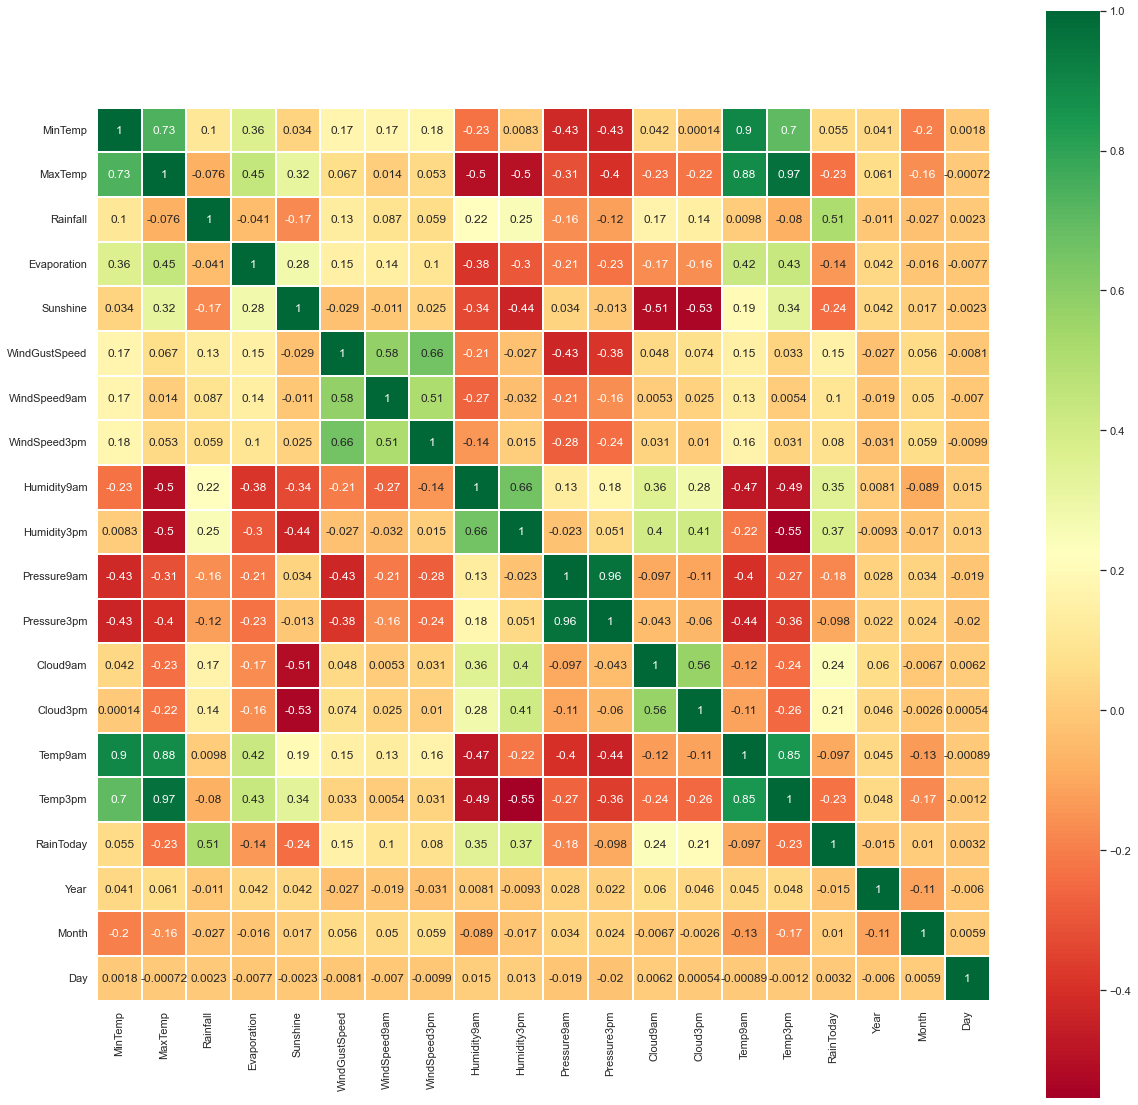

In [48]:
# Checking correlation between each parameter

# Heatmap
corrmat = X_train.corr()
top_corr_feature = corrmat.index

plt.figure(figsize=(20,20))

g = sns.heatmap(X_train[top_corr_feature].corr(), annot=True, cmap='RdYlGn', square=1, linewidths=0.05)

In this correlation matrix, every correlation between each feature are calculated. The result will be vary from `-1 to 1`, in which:
- Any value that getting closer to 1 represent strong positive correlation (symbolized with green color)
- Any value that getting closer to -1 represent strong negative correlation (symbolized with red color)
- Middle value will be 0 that represent neutral correlation (symbolized with yellow color)

And here is conclusion that I made:
- `'MinTemp'` shows high positive correlation with `'Temp9am'`
- `'MaxTemp'` shows high correlation with `'Temp3pm'`
- `'Pressure9am'` shows high positive correlation with `'Pressure3pm'`
- `'WindGustSpeed'` shows medium positive correlation with  `'WindSpeed9am and WindSpeed3pm'`
- `'Humidity9am'` shows medium positive correlation with `'Humidity3pm'`
- `'Cloud9am'` shows medium positive correlation with `'Cloud3pm'`

Since high correlation shows high depedencies between input parameter which is not good, I'll choose one input parameter over another

And here is what I am going to do:
- Choose `'MinTemp & MaxTemp'` to represent `'Temp9am & Temp3pm'`
- Choose `'Pressure9am'` to represent `'Pressure3pm'`
- Choose `'WindGustSpeed'` to represent `'WindSpeed9am and WindSpeed3pm'`, they shares same description and shows similar values. (so i just need to choose one)
- Choose `'Humidity9am'`to represent `'Humidity3pm'`
- Choose `'Cloud9am'` to represent`'Cloud3pm'`

I also think that rain is something that has to do with time of the year, so I'll include `Month and Year` but not `Day` to my model.

In [49]:
# Drop the unused parameter

unused = ['Temp9am', 'Temp3pm', 'Pressure3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity3pm', 'Cloud3pm', 'Day']

for i in [X_train, X_test]:
    i.drop(columns=unused, inplace=True)

Now, let's see our final input parameter correlation matrix.

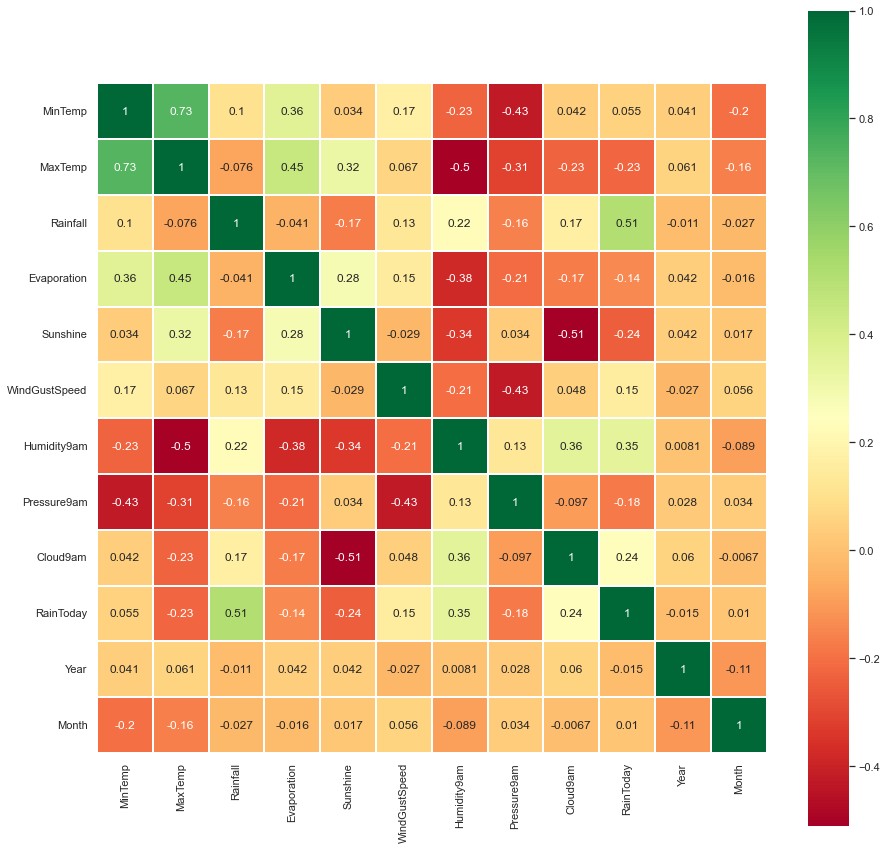

In [50]:
# Final Correlation Matrix

# Heatmap
corrmat = X_train.corr()
top_corr_feature = corrmat.index

plt.figure(figsize=(15,15))

g = sns.heatmap(X_train[top_corr_feature].corr(), annot=True, cmap='RdYlGn', square=1, linewidths=0.05)

Next process will be `'Feature Scaling and Feature Encoding.'` Before go to the next process, I'll classify input parameter into different categories based on its input type:

They are:
- numerical_col = `numerical` input
- categorical_col = `categorical nominal` input

In [51]:
# List all columns
X_train.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'Humidity9am', 'Pressure9am', 'Cloud9am', 'RainToday', 'Year', 'Month'],
      dtype='object')

In [52]:
# Classify input parameter based on input type

numerical_col = [
    'MinTemp', 'MaxTemp', 'Rainfall', 
    'Evaporation', 'Sunshine', 'WindGustSpeed', 
    'Humidity9am', 'Pressure9am', 'Cloud9am',
]

categorical_col = [
    'WindGustDir','WindDir9am', 'RainToday', 'Year', 'Month'
]

# I also choose to only use 'WindDir9am' over 'WindDir3pm', due they actually similar

In [53]:
# Splitting Dataset based on input type

X_train_num = X_train[numerical_col]
X_train_cat = X_train[categorical_col]

X_test_num = X_test[numerical_col]
X_test_cat = X_test[categorical_col]

### Feature Scaling

In this part of sub-process, I will scaled all numerical input parameter so that each input across each input parameter is well balanced.

Since I will use `Logistic Regression and Support Vector Regression` algorithm for my machine learning model, I'll utilize `StandardScaler` as my scaling method.

In [54]:
# # Define the scaling method
# scaler = RobustScaler()

# # Train the data into scaler
# # Use only data from `Train Set` for training
# scaler.fit(X_train_num)

# # Transform the input value for each input parameter
# # Transform both `Train Set` and `Test Set`
# X_train_num_scaled = scaler.transform(X_train_num)
# X_test_num_scaled = scaler.transform(X_test_num)

In [55]:
# Define the scaling method
scaler = StandardScaler()

# Train the data into scaler
# Use only data from `Train Set` for training
scaler.fit(X_train_num)

# Transform the input value for each input parameter
# Transform both `Train Set` and `Test Set`
X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

### Feature Encoding

Since all of my categorical columns has no input that shows order/hierarchy, I will utilize `OneHot` encoding method.

In [56]:
# Define the encoding method
encoder = OneHotEncoder()

# Train the data into encoder
# Use only data from `Train Set` for training
encoder.fit(X_train_cat)

# Transform the input value for each input parameter
# Transform both `Train Set` and `Test Set`
X_train_cat_encoded = encoder.transform(X_train_cat).toarray()
X_test_cat_encoded = encoder.transform(X_test_cat).toarray()

### Concantenate Back Dataset

In this part of sub-process, I will concatenate `'numerical_col'` and `'categorical_col'` into one dataframe.

In [57]:
# Concatenate

X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)

In [58]:
# Turn it into dataframe

df_X_train_final = pd.DataFrame(X_train_final)
df_X_train_final.sample(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
6974,-1.471286,-0.610039,-0.280691,-0.119353,0.148811,-0.373792,-0.573428,-0.007785,0.155450,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
77556,-0.703743,-1.116579,-0.280691,-0.119353,0.148811,-0.068812,0.801113,0.451824,-1.152062,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5750,-1.220660,-0.624109,-0.280691,-0.119353,0.148811,-1.517467,0.801113,2.053042,0.155450,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
81075,-0.077177,-0.539686,-0.280691,0.128894,0.762570,0.312414,-0.414827,-1.193872,-1.587899,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60904,-1.439958,-1.271355,-0.061750,-0.119353,0.148811,-0.755017,1.594117,-0.378437,0.155450,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
80664,0.784351,0.557818,-0.280691,-0.305539,1.268019,-0.221302,-0.573428,-0.452568,-1.587899,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
16072,0.706031,1.570899,-0.280691,0.004770,0.979191,0.083679,1.224048,0.021867,-1.587899,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76,0.032472,0.543748,-0.280691,0.501266,0.148811,0.236169,-0.203359,-0.526698,-1.587899,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42793,-1.251988,-0.947732,-0.280691,-0.988221,-0.898190,-0.526282,0.642512,1.015216,0.591288,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20127,0.189114,0.740736,-0.232038,-0.119353,0.148811,0.769884,-1.260698,-0.007785,0.155450,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
print(df_X_train_final.shape)

(99400, 42)


## VI. Model Definition

### Algortihm : Logistic Regression &  Support Vector Machine
In this project I will try to use Logistic Regression &  Support Vector Machine algorithm in predicting `RainTomorrow` parameter. I'll compare both algorithm and decide which one is the best

In [60]:
# Model Definition
model_1 = LogisticRegression(
    penalty='elasticnet',
    l1_ratio= 0.5,
    C= 1.0,
    solver='saga' # prefered due to large dataset
)

In [61]:
# Model Definition
model_2 = SVC(
    kernel='poly',
    degree=3,
    cache_size=2000
    )

### Hyperparameter

**Logistic Regression**

- Penalty : specify the norm of the penalty
- l1_ratio : specify the ratio between l1 and l2 penalties
- C : inverse of regularization strength; must be a positive float. Like in support vector machine, the larger the value, the more regularization (aka L2)
- solver : Algorithm to use in the optimization problem.

And here is my initial hyperparameter:

- Penalty: 'elasticnet'
- l1_ratio:  0.5
- C : 1.0
- solver : 'saga' due to my dataset is quite large.

**Support Vector Classifier**

- kernel: Specifies the kernel type to be used in the algorithm.
- degree: Degree of the polynomial kernel function (‘poly’)

And here is my initial hyperparameter:

- kernel: poly
- degree: 3

### Model
Here is my initial `RainTomorrow` prediction model:

- Target Parameter (Label) : `RainTomorrow`
- Input Parameter (Features) : [`'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                                'WindGustDir', 'WindGustSpeed', 'WindDir9am', 
                                'Humidity9am', 'Pressure9am', 'Cloud9am', 'RainToday', 'Year', 'Month'`]

This is only initial model, it may change in the future depends on my model evaluation result.


### Model Evaluation (Metrics)

Since the target of this project is `classification`, I will use these error metrics for evaluating my model:
- F1 Score
- ROC-AUC Score

## VII. Model Training

In this part of process I will feed my model and train it to predict `RainTomorrow` value.

In [62]:
# Model Training 
model_1.fit(X_train_final, y_train)

LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga')

In [63]:
# Model Training 
model_2.fit(X_train_final, y_train)

SVC(cache_size=2000, kernel='poly')

In [64]:
# Prediction using `Train_Set` on 1st model
y_train_pred_1 = model_1.predict(X_train_final)

# Prediction using `Train_Set` on 2nd model
y_train_pred_2 = model_2.predict(X_train_final)

## VIII. Model Evaluation

In this part of process, I will try to evaluate the trained model and make conclusion out of it.

In [65]:
# Prediction using `Test_Set` on 1st model
y_test_pred_1 = model_1.predict(X_test_final)
y_test_pred_2 = model_2.predict(X_test_final)

# Result
print(y_test_pred_1)
print(y_test_pred_2)

[0. 0. 0. ... 0. 1. 0.]
[0. 0. 0. ... 0. 0. 0.]


For comparing result between model, I will see the `R-squared Score` only. Based on the score I can say that my model is perform better using `standard linear regression` algorithm. It has  `R-squared Score` closer to 1.

In [66]:
# Evaluation for training phase
print('==================== Train Results (Logistic Regression) ====================')
print(classification_report(y_train, y_train_pred_1))

print('================ Train Results (Support Vector Classifier) ==================')
print(classification_report(y_train, y_train_pred_2))

==================== Train Results (Logistic Regression) ====================
              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89     77111
         1.0       0.67      0.40      0.50     22289

    accuracy                           0.82     99400
   macro avg       0.76      0.67      0.70     99400
weighted avg       0.81      0.82      0.80     99400

================ Train Results (Support Vector Classifier) ==================
              precision    recall  f1-score   support

         0.0       0.85      0.97      0.90     77111
         1.0       0.77      0.39      0.52     22289

    accuracy                           0.84     99400
   macro avg       0.81      0.68      0.71     99400
weighted avg       0.83      0.84      0.82     99400



In [67]:
# Evaluation for trainingtest phase
print('==================== Test Results (Logistic Regression) ====================')
print(classification_report(y_test, y_test_pred_1))

print('==================== Test Results (Support Vector Classifier) ====================')
print(classification_report(y_test, y_test_pred_2))

==================== Test Results (Logistic Regression) ====================
              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89     33048
         1.0       0.67      0.39      0.49      9552

    accuracy                           0.82     42600
   macro avg       0.76      0.67      0.69     42600
weighted avg       0.80      0.82      0.80     42600

==================== Test Results (Support Vector Classifier) ====================
              precision    recall  f1-score   support

         0.0       0.84      0.96      0.90     33048
         1.0       0.74      0.37      0.49      9552

    accuracy                           0.83     42600
   macro avg       0.79      0.66      0.69     42600
weighted avg       0.82      0.83      0.81     42600



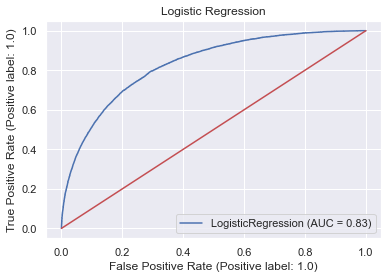

In [68]:
# ROC-AUC Score
plot_roc_curve(model_1, X_test_final, y_test)
plt.title('Logistic Regression')
plt.plot([0,1], [0,1], c='r')
plt.show()

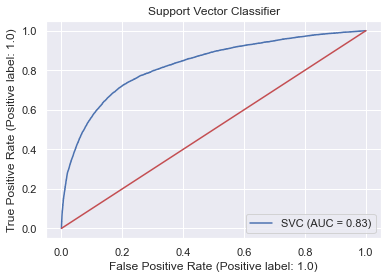

In [69]:
# ROC-AUC Score
plot_roc_curve(model_2, X_test_final, y_test)
plt.title('Support Vector Classifier')
plt.plot([0,1], [0,1], c='r')
plt.show()

### Model Evaluation Interpretation

**Classification Report**

Based on result above my model `tends` to be able predict if `tomorrow is not raining` relatively well compared to predict if `tomorrow is raining`. This is seen from F-1 score in `'0'` category that shows around 80% score, while F-1 score in `'1'` category that shows around 50% score. 

this is happened due to imbalance data used for training (seen in support), Hence this model needed to learn from balanced resampled data to improve its performance.

**AUC-ROC Score**

Based on the result, the model will be able to classify/differentiate wether `RainTomorrow` is `0` or `1`, around 83% of the time.

**Score Differences between each Phase**
>It can be seen that the results of the model evaluation on training and tests are not so different for both model, I can conclude that my prediction results are `good fit.` But since model_1 is more time efficient, I'll use model_1 for inference set.

Since tboth model result is similar, I'll use `Logistic Regression` further test on `Inference Set` due it's slightly better.

## IX. Model Inference
In this part of process, I will try to feed the machine learning model using the `Inference Set` and see how it perform.

Before feeding the set into the model, We need to do exact same process of `Missing value handling, Feature selection and engineering` process to the `Inference Set`

In [70]:
# Null value summary
inf_set.isnull().sum().sort_values()

MinTemp           0
Year              0
RainTomorrow      0
Temp9am           0
Month             0
Day               0
MaxTemp           0
WindSpeed9am      2
Rainfall          2
RainToday         2
Humidity9am       3
Temp3pm           4
WindSpeed3pm      5
Humidity3pm       6
WindDir3pm        7
WindGustSpeed    12
WindGustDir      12
WindDir9am       16
Pressure9am      18
Pressure3pm      18
Cloud9am         70
Cloud3pm         75
Evaporation      78
Sunshine         82
dtype: int64

I'll just handle missing value on input parameter only. Remember that previously I had stored `Mean, Median, and Mode` for each input parameter that was taken from `X_train` set. Now I'll use it again to fill those missing values.

In [71]:
# Shows the dict
print(num_col_med)
print()
print(num_col_mean)
print()
print(cat_col_mode)

{'WindGustSpeed': 39.0, 'Rainfall': 0.0, 'Evaporation': 4.8, 'Sunshine': 8.4, 'WindSpeed9am': 13.0, 'WindSpeed3pm': 19.0}

{'MinTemp': 12.0, 'MaxTemp': 22.6, 'Humidity9am': 70.0, 'Humidity3pm': 52.0, 'Pressure9am': 1017.6, 'Pressure3pm': 1015.2, 'Cloud9am': 5.0, 'Cloud3pm': 5.0, 'Temp9am': 16.7, 'Temp3pm': 21.1}

{'WindGustDir': 'S', 'WindDir9am': 'N', 'WindDir3pm': 'S', 'RainToday': 0.0}


In [72]:
# Combines num_col_mean and num_col_med into same dictionary
num_col_mean_med = num_col_mean.copy()
num_col_mean_med.update(num_col_med)

In [73]:
# Impute the missing value

for i in inf_set.columns:
    if i in num_col:
        inf_set[i].fillna(num_col_mean_med[i], inplace=True)
    elif i in cat_col:
        inf_set[i].fillna(cat_col_mode[i], inplace=True)

In [74]:
# Confirmation
inf_set.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64

It's confirmed that the `Inference Set` input parameter is no free from any missing value.

Missing value in `RainTomorrow` will be predicted using my model

Now Let's split the dataset

In [75]:
# Splitting Dataset

# X will be consist of input parameter only
X_inf = inf_set.drop(['RainTomorrow'], axis=1)

# y will be consist of target parameter only
y_inf = inf_set['RainTomorrow']

In [76]:
# Set same input parameter used on Train Set
col = []

for i in numerical_col:
    col.append(i)

for i in categorical_col:
    col.append(i)

X_inf = pd.DataFrame(X_inf[col])

In [77]:
# Splitting Dataset based on input type

X_inf_num = X_inf[numerical_col]
X_inf_cat = X_inf[categorical_col]

In [78]:
X_inf_num 

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,Humidity9am,Pressure9am,Cloud9am
86783,21.0,25.3,0.4,2.6,0.8,50.0,85.0,1013.3,7.0
76156,17.9,36.3,0.0,10.0,8.8,35.0,68.0,1020.0,3.0
28773,5.7,16.8,0.0,4.8,8.4,15.0,98.0,1029.8,8.0
128019,10.8,16.3,8.0,4.0,7.0,72.0,70.0,1010.3,5.0
85872,22.2,31.7,0.0,6.2,10.6,24.0,59.0,1015.7,5.0
...,...,...,...,...,...,...,...,...,...
65789,7.4,14.1,0.2,1.6,3.7,56.0,75.0,1025.1,7.0
48504,9.2,28.9,0.0,4.8,8.4,37.0,72.0,1017.0,5.0
8417,25.6,40.5,0.0,14.6,8.4,54.0,26.0,1012.5,6.0
47905,2.4,19.5,0.0,4.8,8.4,37.0,59.0,1014.7,5.0


In [79]:
X_inf_cat

,WindGustDir,WindDir9am,RainToday,Year,Month
86783,S,S,0.0,2014,6
76156,N,N,0.0,2010,2
28773,S,W,0.0,2015,6
128019,S,W,1.0,2012,4
85872,N,S,0.0,2011,10
...,...,...,...,...,...
65789,W,W,0.0,2008,8
48504,N,W,0.0,2010,12
8417,N,N,0.0,2016,1
47905,N,S,0.0,2009,4


After splitting the dataset, I will feature scaling and feature encoding the `inference set` so it has the same dataframe shape that is recognizeable by my machine learning model.

### Feature Scaling

In [80]:
# Transform the input value for each input parameter
X_inf_num_scaled = scaler.transform(X_inf_num)

### Feature Encoding

In [81]:
# Transform the input value for each input parameter
X_inf_cat_encoded = encoder.transform(X_inf_cat).toarray()

### Concatenate Dataset

In [82]:
# Concatenate

X_inf_final = np.concatenate([X_inf_num_scaled, X_inf_cat_encoded], axis=1)

In [83]:
# Check
# Turn it into dataframe first

df_X_inf_final = pd.DataFrame(X_inf_final)
df_X_inf_final.sample(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
163,-1.847225,-1.609049,-0.280691,-0.802035,-1.403638,0.617394,0.906847,0.466650,0.591288,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
33,-2.035195,-1.158791,-0.280691,-0.119353,0.148811,-1.593712,1.594117,1.845477,0.155450,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
105,-0.484445,-0.610039,-0.280691,0.253018,-1.584156,-0.068812,-0.573428,-0.763916,1.027125,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13,0.032472,0.037207,-0.280691,-0.119353,0.148811,0.083679,-0.309093,0.095998,0.155450,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162,0.345755,2.457344,-0.280691,1.121886,1.953985,-0.221302,-0.309093,-0.230176,0.155450,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91,-0.265147,-0.975873,1.300553,-0.119353,0.148811,-0.526282,0.906847,-1.001133,0.155450,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76,-0.985697,-0.877379,-0.280691,-0.181415,-0.753776,0.083679,-0.361960,1.015216,0.155450,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
169,-1.095346,-0.272345,-0.280691,-0.119353,0.148811,-1.746202,0.431044,1.133824,0.155450,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57,-0.061513,-1.018085,0.765362,-0.119353,0.148811,1.074864,1.118315,-1.861046,0.155450,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
107,-0.390460,-0.342698,0.084211,-0.119353,0.148811,-0.068812,0.272443,-0.007785,1.027125,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


After done preparing the dataframe, let's feed it into the model.

### Prediction

In [84]:
# Determines prediction result
y_inf_pred = model_1.predict(X_inf_final)

### Evaluation

In [85]:
# Evaluation for inference set
print('==================== Inference Results (Logistic Regression) ====================')
print(classification_report(y_inf, y_inf_pred))

==================== Inference Results (Logistic Regression) ====================
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.92       157
         1.0       0.67      0.50      0.57        36

    accuracy                           0.86       193
   macro avg       0.78      0.72      0.74       193
weighted avg       0.85      0.86      0.85       193



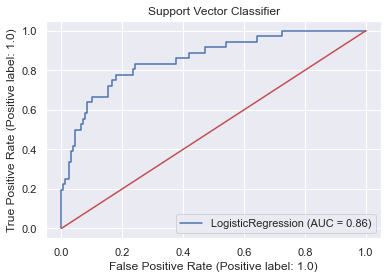

In [86]:
# ROC-AUC Score
plot_roc_curve(model_1, X_inf_final, y_inf)
plt.title('Support Vector Classifier')
plt.plot([0,1], [0,1], c='r')
plt.show()

Based from score above, I can tell that my model perform better in `inference set.` Compared to previous train and test phase score, current score has 3% differences, this may indicates to `underfitting`.

## X. Conclusion

Here all the conclusion that I get from this project

### Overall Dataset

- This dataset contains several information that represent `weather condition` in several location `in Australia`. This dataset has size of 145460 rows times 23 columns.
- `RainTomorrow` will be the target parameter for this classification project.
- Proporsion of instances that represent wether `RainTomorrow` value is 'no' or 'yes' is 77.58% and 23.42% respectively.
- Based on `pearson` correlation matrix, there are input parameter like `Rainfall, WindGustSpeed, WindSpeed, Humidity, and Cloud` has positive correlation with target parameter `RainTomorrow.`
- Also input parameter like `MaxTemp, Temp, Sunshine, and Pressure` has negative correlation with the target parameter `RainTomorrow`
- I decide to not use `Location` input parameter as feature due to I don;t want my model to be too specific to a specific location.
- Also I decide ro simplify the `Wind Direction` input parameter from 16-wind direction format to 4-wind direction format. 

### Algorithm, Model, and Evaluation Metrics.

- For this classification project, I decide to use `Logistic Regresion` and `Support Vector Classifier` as my algorithm and find out which one is the best.

Hyperparameter for my initial model are as follows:

**Logistic Regression**
- Penalty: 'elasticnet'
- l1_ratio:  0.5
- C : 1.0
- solver : 'saga' due to my dataset is quite large.

**Support Vector Classifier**
- kernel: poly
- degree: 3

Here is my initial prediction model:
- Target Parameter (Label) : `RainTomorrow`
- Input Parameter (Features) : [`'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                                'WindGustDir', 'WindGustSpeed', 'WindDir9am', 
                                'Humidity9am', 'Pressure9am', 'Cloud9am', 'RainToday', 'Year', 'Month'`]

And I will use these `metrics` to evaluate my model:
- F1 Score
- ROC-AUC Score

### Model Performance

- On train phase of the model, both `Logistic Regresion` and `Support Vector Classifier` shows similar performance.

In [87]:
# Evaluation for training phase
print('==================== Train Results (Logistic Regression) ====================')
print(classification_report(y_train, y_train_pred_1))

print('================ Train Results (Support Vector Classifier) ==================')
print(classification_report(y_train, y_train_pred_2))

==================== Train Results (Logistic Regression) ====================
              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89     77111
         1.0       0.67      0.40      0.50     22289

    accuracy                           0.82     99400
   macro avg       0.76      0.67      0.70     99400
weighted avg       0.81      0.82      0.80     99400

================ Train Results (Support Vector Classifier) ==================
              precision    recall  f1-score   support

         0.0       0.85      0.97      0.90     77111
         1.0       0.77      0.39      0.52     22289

    accuracy                           0.84     99400
   macro avg       0.81      0.68      0.71     99400
weighted avg       0.83      0.84      0.82     99400



- On test phase of the model, both `Logistic Regresion` and `Support Vector Classifier` also shows similar performance.

In [88]:
# Evaluation for trainingtest phase
print('==================== Test Results (Logistic Regression) ====================')
print(classification_report(y_test, y_test_pred_1))

print('==================== Test Results (Support Vector Classifier) ====================')
print(classification_report(y_test, y_test_pred_2))

==================== Test Results (Logistic Regression) ====================
              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89     33048
         1.0       0.67      0.39      0.49      9552

    accuracy                           0.82     42600
   macro avg       0.76      0.67      0.69     42600
weighted avg       0.80      0.82      0.80     42600

==================== Test Results (Support Vector Classifier) ====================
              precision    recall  f1-score   support

         0.0       0.84      0.96      0.90     33048
         1.0       0.74      0.37      0.49      9552

    accuracy                           0.83     42600
   macro avg       0.79      0.66      0.69     42600
weighted avg       0.82      0.83      0.81     42600



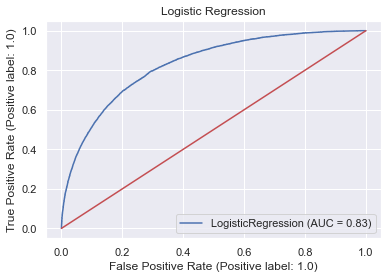

In [89]:
# ROC-AUC Score
plot_roc_curve(model_1, X_test_final, y_test)
plt.title('Logistic Regression')
plt.plot([0,1], [0,1], c='r')
plt.show()

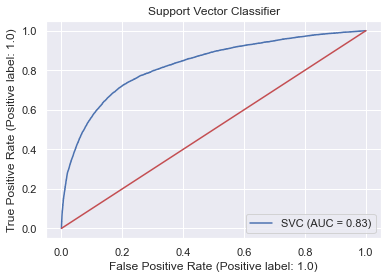

In [90]:
# ROC-AUC Score
plot_roc_curve(model_2, X_test_final, y_test)
plt.title('Support Vector Classifier')
plt.plot([0,1], [0,1], c='r')
plt.show()

- Based from result above, there is small difference in performance between `Train Phase` and `Test Phase` for both model. I can conclude that both model is `good fit` with the given dataset.
- Although both model are `good fit` with the given dataset, both model has `tendency` to `perform relatively well` on predicting if tomorrow will be `not raining (0)` compared to predict if tomorrow will be `raining (1)`.
- This seen in both F-1 Score on `0` category that has score almost 90%, compared to Score on `1` category that has score only around 50%.
- I suspect this weighted prediction (e.g. tends to perform well on predicting class `0`) is due to imbalance data used for training (seen in support).

Since both model has similar performance, I decide to use model with `Logistic Regression` for inference.

### Inference Result

These how my model (Logistic Regression) perform between each phase.

In [91]:
# Evaluation for inference set
print('==================== Train Results (Logistic Regression) ====================')
print(classification_report(y_train, y_train_pred_1))

print('==================== Test Results (Logistic Regression) ====================')
print(classification_report(y_test, y_test_pred_1))

print('==================== Inference Results (Logistic Regression) ====================')
print(classification_report(y_inf, y_inf_pred))


==================== Train Results (Logistic Regression) ====================
              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89     77111
         1.0       0.67      0.40      0.50     22289

    accuracy                           0.82     99400
   macro avg       0.76      0.67      0.70     99400
weighted avg       0.81      0.82      0.80     99400

==================== Test Results (Logistic Regression) ====================
              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89     33048
         1.0       0.67      0.39      0.49      9552

    accuracy                           0.82     42600
   macro avg       0.76      0.67      0.69     42600
weighted avg       0.80      0.82      0.80     42600

==================== Inference Results (Logistic Regression) ====================
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.92       157


- Based on F-1 score, there is around 3% difference between `Train Phase & Test Phase` and `Inference Phase`.
- This could indicate that actually the model is `underfitting`.

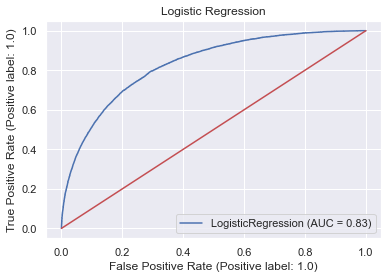

In [92]:
# ROC-AUC Score
plot_roc_curve(model_1, X_test_final, y_test)
plt.title('Logistic Regression')
plt.plot([0,1], [0,1], c='r')
plt.show()

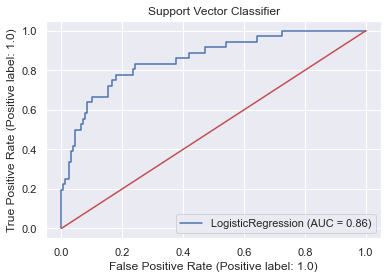

In [93]:
# ROC-AUC Score
plot_roc_curve(model_1, X_inf_final, y_inf)
plt.title('Support Vector Classifier')
plt.plot([0,1], [0,1], c='r')
plt.show()

- In AUC score also indicates that the model is `underfitting`.

My Final conclusion is that my model is not yet ready to be implemented in the real world.

### Room Improvement

I well aware that my model is not yet ready to be implemented in the real world right now. Room for improvement that I can think of to improve my model performance is as follows:

- Reconsider the input parameter used in the model. (e.g try to add `Location` as one of the input parameter)
- Use `up or down-sampling` to balance the dataset used for training.
- Do hyperparameter tuning for the model.

I'll save this work for later time or for whomever have same interest for this project.